# ABEL HiPACE++ example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
#import sys
#sys.path.append('../')
from abel import *

### Define the input beams

In [2]:
# define witness bunch
witness = SourceBasic()
witness.charge = -0.6e-9 # [C]
witness.energy = 10e9 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 10e-6 # [m]
witness.z_offset = -160e-6 # [m]
witness.emit_nx, witness.emit_ny = 1e-6, 1e-6 # [m rad]
witness.beta_x, witness.beta_y = 10e-3, 10e-3 # [m]
witness.num_particles = 100000
witness.x_offset, witness.y_offset = 5e-6, 1e-6 # [m]
witness.jitter.x = 5e-6

# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 100e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 100e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 50e-3, 50e-3 # [m]
driver.num_particles = 100000
driver.symmetrize = True

### Define the experimental setup

[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.


initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation


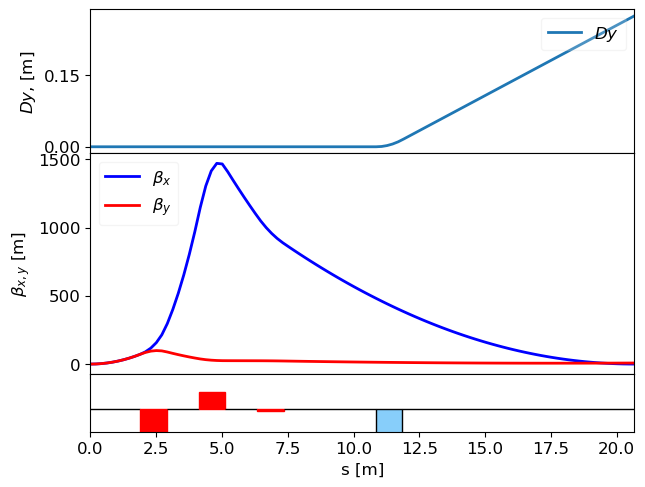

In [3]:
# define stage
stage = StageHipace()
stage.driver_source = driver
#stage.length = 0.5 # [m]
stage.length = 0.0001 # [m]
stage.plasma_density = 1e22 # [m^-3]
stage.ion_motion = False
stage.beam_ionization = False

# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = stage.matched_beta_function(witness.energy) # [m]
bds.beta_y = stage.matched_beta_function(witness.energy) # [m]

# define spectrometer
spectrometer = SpectrometerFacetOcelot()
spectrometer.exact_tracking = False
spectrometer.bend_angle = -0.03 # [T]
spectrometer.obj_plane = 0 # [m]
spectrometer.mag_x = -2
spectrometer.img_energy = 10e9 # [eV]
spectrometer.plot_twiss()

# define experiment
experiment = Experiment(witness, bds, stage, spectrometer)

### Perform linac tracking

In [4]:
# perform experiment tracking
experiment.stage.num_nodes = 4
beam = experiment.run('hipace_example', overwrite=False)

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 10.0 GeV, -0.60 nC, 1.0% rms, 1.0/1.0 µm-rad)
Tracking element 2 (BeamDeliverySystemBasic, stage 0, s = 0.0 m, 10.0 GeV, -0.60 nC, 1.0% rms, 1.0/1.0 µm-rad)
Running HiPACE locally in folder 'run_data/temp/20a1de4f-0889-4fab-8b53-ebbceef89910'...
Initializing AMReX (24.05-1-g1735fd5c65d6)...
MPI initialized with 1 MPI processes
MPI initialized with thread support level 0
OMP initialized with 2 OMP threads
AMReX (24.05-1-g1735fd5c65d6) initialized
HiPACE++ (v24.03-23-gcb94a319796c) running in double precision
using the leapfrog plasma particle pusher
using R2R FFTW of size 511 * 511
00:00:00 Rank 0 started step 0 at time = 0 with dt = 3.335640952e-13
00:03:30 Rank 0 started step 1 at time = 3.335640952e-13 with dt = 3.335640952e-13


TinyProfiler total time across processes [min...avg...max]: 512.1 ... 512.1 ... 512.1

--------------------------------------------------------------------------------------------------
Name               

### Plot the wakefield

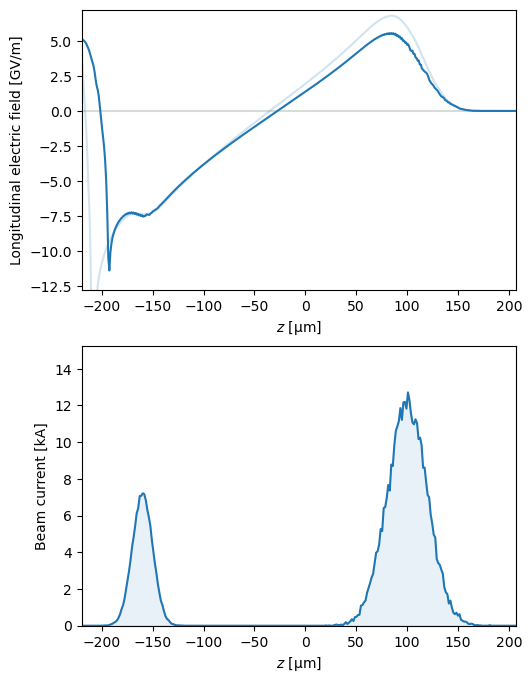

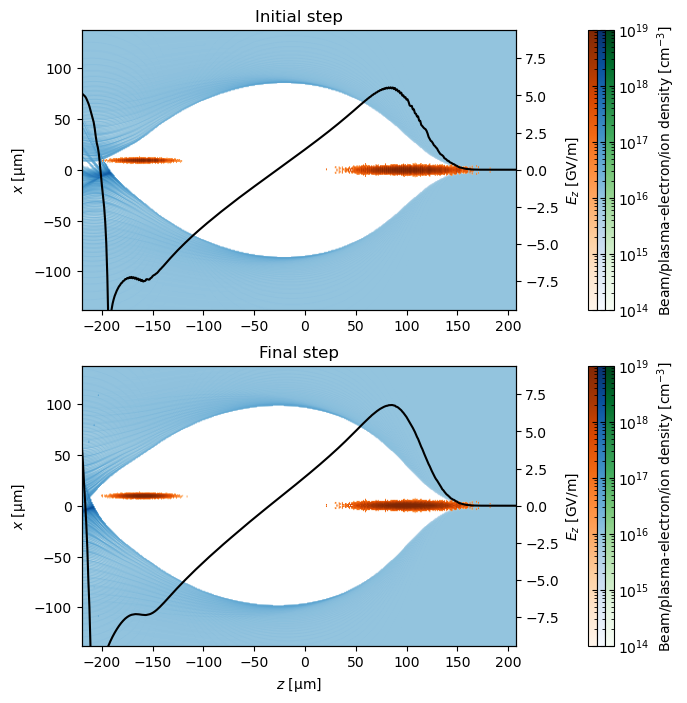

In [5]:
# plot wakefield
experiment.stage.plot_wakefield()
experiment.stage.plot_wake()

### Plot the spectrometer screen

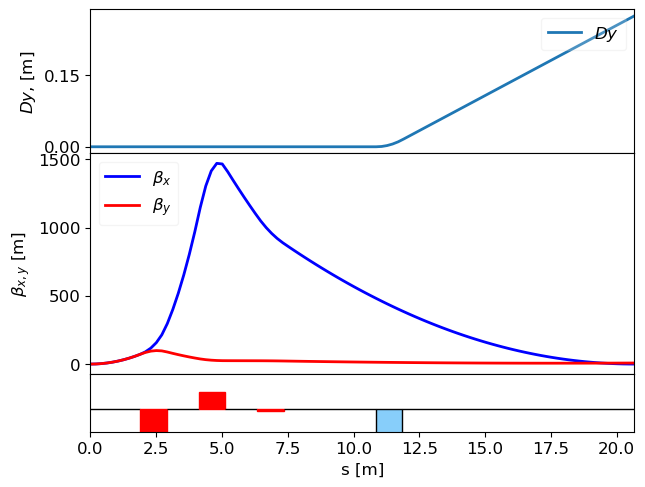

In [6]:
# plot the spectrometer imaging
spectrometer.plot_twiss()

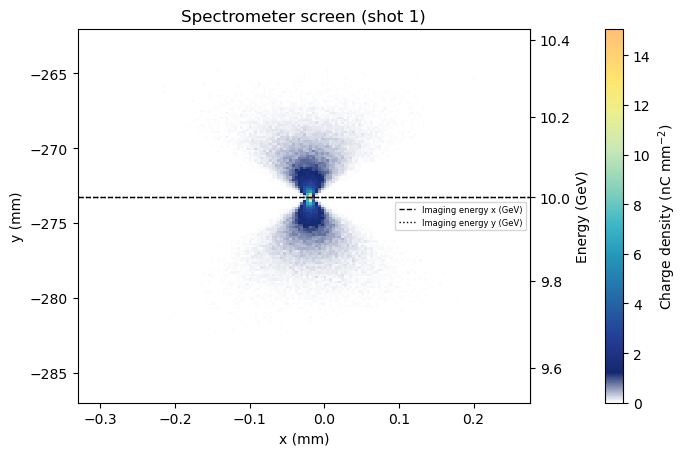

In [7]:
# plot the screen
experiment.plot_spectrometer_screen()

### Plot longitudinal phase space

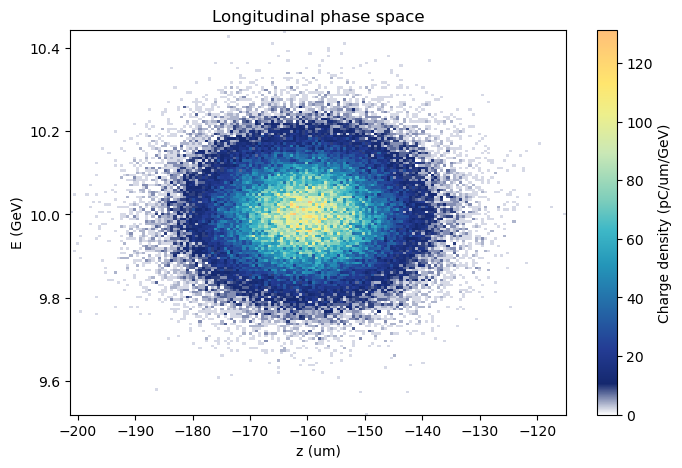

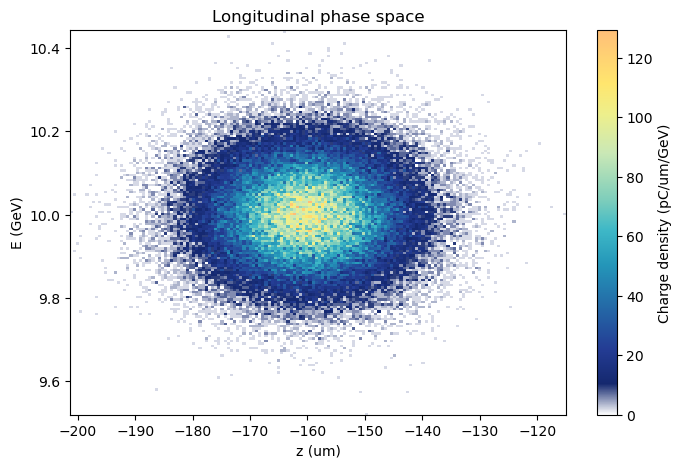

In [8]:
# plot the longitudinal phase space (at the beginning and end of the stage)
experiment.initial_beam.plot_lps()
experiment.get_beam(-2).plot_lps()